<a href="https://colab.research.google.com/github/lnpu/firstNeuralNetwork/blob/master/FirstNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plot

In [0]:
class NN:
  # construct neural work struction
  def __init__(self, inputNodes, hiddenNodes,outputNodes, learningRate):
    self.iNode = inputNodes
    self.hNode = hiddenNodes
    self.oNode = outputNodes
    self.lr = learningRate
    self.wih = np.random.normal(0.0,pow(self.hNode,-0.5),(self.hNode, self.iNode)) #(np.random.rand(self.hNode, self.iNode)-0.5)
    self.who = np.random.normal(0.0,pow(self.oNode,-0.5),(self.oNode, self.hNode)) #(np.random.rand(self.oNode, self.hNode)-0.5)
    self.activation_function = lambda x:sp.expit(x)
    pass
  # using activation function iterate network once
  def train(self, input_list, target_list):
    inputs = np.array(input_list, ndmin=2).T
    targets = np.array(target_list, ndmin=2).T 
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)
    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.who.T, output_errors)
    # using back propagation to update weight
    self.wih += self.lr * np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), np.transpose(inputs))
    self.who += self.lr * np.dot((output_errors*final_outputs*(1.0-final_outputs)), np.transpose(hidden_outputs))
    pass
  # predict an input using trained network
  def predict(self, inputs_list):
    inputs = np.array(inputs_list, ndmin = 2).T
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)
    return final_outputs

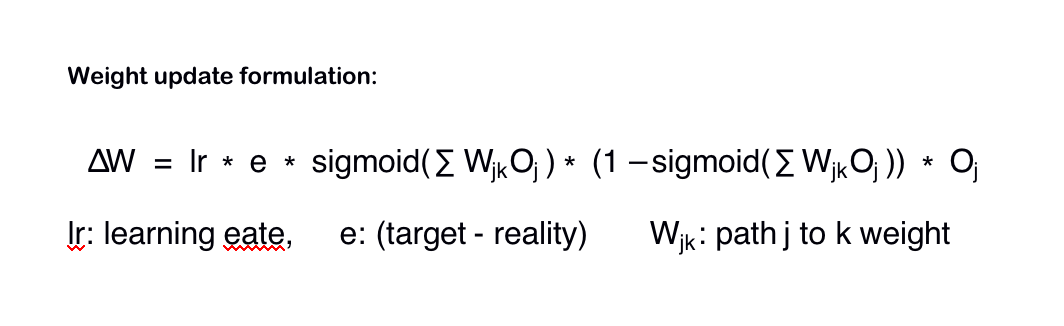

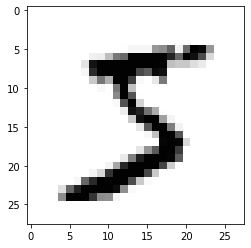

In [0]:
data_file = open('/content/mnist_train_100.csv', 'r')
data_list = data_file.readlines()
data_file.close()
all_values = data_list[0].split(',')
# convert 0-255 to 0.01-0.09 and reshape it to a matrix
image_array = (np.asfarray(all_values[1:])/255.0*0.99 + 0.01).reshape(28,28)
plot.imshow(image_array, cmap='Greys', interpolation='None')

In [0]:
iNode = 784
oNode = 10
hNode = 100

In [0]:
# training neural network
nn = NN(iNode,hNode,oNode,0.5)
for line in data_list:
  all_values = line.split(',')
  correct_label = int(all_values[0])
  inputs = (np.asfarray(all_values[1:])/255.0*0.99 + 0.01) #.reshape(28,28)
  targets = np.zeros(oNode)+0.01
  targets[int(all_values[0])] = 0.99
  nn.train(inputs, targets)
  pass

In [0]:
# test neural network 1
_tfile = open('/content/mnist_test_10.csv')
data_list = _tfile.readlines()
_tfile.close()
all_values = data_list[0].split(',')
nn.predict((np.asfarray(all_values[1:])/255*0.99)+0.01)

array([[0.01268669],
       [0.00769557],
       [0.00470416],
       [0.00133833],
       [0.01740392],
       [0.04379086],
       [0.0738947 ],
       [0.21560803],
       [0.00355613],
       [0.03722208]])

In [0]:
# test neural network 2 use scorecard
scorecard = []
for line in data_list:
  all_values = line.split(',')
  correct_label = int(all_values[0])
  inputs = (np.asfarray(all_values[1:])/255.0*0.99 + 0.01) #.reshape(28,28)
  outputs = nn.predict(inputs)
  label = np.argmax(outputs)
  print("real: %s, predict: %s\n"%(correct_label, label))
  scorecard.append(1 if label==correct_label else 0)
  pass
print("Accuracy : %f"%(len([i for i in scorecard if i>0])/len(scorecard)))

real: 7, predict: 9

real: 2, predict: 2

real: 1, predict: 1

real: 0, predict: 9

real: 4, predict: 9

real: 1, predict: 1

real: 4, predict: 9

real: 9, predict: 9

real: 5, predict: 5

real: 9, predict: 9

Accuracy : 0.600000


In [0]:
from google.colab import drive
drive.mount('/content/drive')